$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

## Scaled Conjugate Gradient Algorithm

### The Scaled Part

The first derivative of an error function with respect to the
parameters of your model tells you which direction in the parameter
space to proceed to reduce the error function.  But how far do you go?
So far we have just taken a small step by subtracting a small constant
times the derivative from our current parameter values.

If we are in the vicinity of a minimum of the error function, we could
do what Newton did...approximate the function at the current parameter
value with a parabola and solve for the minimum of the parabola.  Use
this as the next guess at a good parameter value.  If the error
function is quadratic in the parameter, then we jump to the true
minimum immediately.

How would you fit a parabola to a function at a particular value of
$x$?  We can derive a way to do this using a truncated Taylor series
(google that) to approximate the function about a value of $x$:

$$
f(x+\Delta x) \approx \hat{f}(x+\Delta x) = f(x) + f'(x) \Delta x + \frac{1}{2} f''(x) \Delta x^2
+ \cdots
$$

Now we want to know what value of $\Delta x$ minimizes
$\hat{f}(x+\Delta x)$.  So take its derivative and set equal to zero.

$$
\begin{align*}
\frac{d \hat{f}(x+\Delta x)}{d\Delta x} &= f'(x) + \frac{1}{2} 2 f''(x)
\Delta x\\
& = f'(x) + f''(x) \Delta x
\end{align*}
$$

Setting equal to zero we get

$$
\begin{align*}
0 &= f'(x) + f''(x) \Delta x\\
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$

Now we can update our guess for $x$ by adding $\Delta x$ to it.  Then,
fit a new parabola at the new value of $x$, calculate $\Delta x$, and
update $x$ again.  Actually, the last equation above does the parabola
approximation and calculation of $\Delta x$.

Here is a simple example.  Say we want to find the minimum of

$$
f(x) = 2 x^4 + 3 x^3 + 3
$$
To calculate

$$
\begin{align*}
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$

we need the function's first and second derivatives.  The are

$$
\begin{align*}
f'(x) &= 8 x^3 + 9 x^2\\
f''(x) &= 24 x^2 + 18 x
\end{align*}
$$

All together now, in python!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

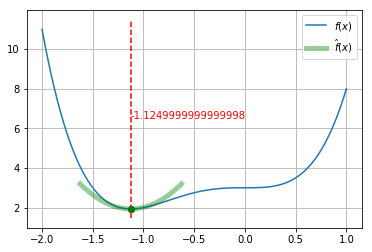

In [3]:
def f(x):
    return 2 * x**4 + 3 * x**3 + 3

def df(x): 
    return 8 * x**3 + 9 * x**2

def ddf(x):
    return 24 * x**2 + 18*x

x = -2  # our initial guess
def taylorf(x,dx):
    return f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

x = -2  # first guess at minimum

xs = np.linspace(-2,1,num=100)

fig = plt.figure()

dxs = np.linspace(-0.5,0.5,num=100)

for rep in range(10):
    time.sleep(2) # sleep 2 seconds
    plt.clf()
    plt.plot(xs,f(xs))
    plt.grid('on')
    plt.plot(x+dxs, taylorf(x,dxs),'g-',linewidth=5,alpha=0.4)
    plt.plot(x,f(x),'ro')         
    y0,y1 = plt.ylim()
    plt.plot([x,x],[y0,y1],'r--')
    
    x = x - df(x) / float(ddf(x))
    plt.plot(x,f(x),'go')
    plt.text(x,(y0+y1)*0.5,str(x),color='r')
    plt.legend(('$f(x)$','$\hat{f}(x)$'))
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

This has all been for a function $f(x)$ of a single, scalar variable
$x$.  To minimize a squared error function for a neural network, $x$
will consist of all the weights of the neural network.  If all of the
weights are collected into the vector $\wv$, then the first derivative
of the squared error function, $f$, with respect to the weight vector,
$\wv$, is a vector of derivatives like $\frac{\partial f}{\partial
w_{i}}$.  This is usually written as the gradient

$$
\nabla_{\wv} f =
(\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},
\ldots, \frac{\partial f}{\partial w_{n}}).
$$

The second derivative will be $n\times n$ matrix of values like
$\frac{\partial^2 f}{\partial w_i \partial w_j}$, usually
written as the Hessian

$$
\nabla^2_{\wv} f =
\begin{pmatrix}
\frac{\partial^2 f}{\partial w_1 \partial w_1} & 
\frac{\partial^2 f}{\partial w_1 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_1 \partial w_n}\\
\frac{\partial^2 f}{\partial w_2 \partial w_1} & 
\frac{\partial^2 f}{\partial w_2 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_2 \partial w_n}\\
\vdots \\
\frac{\partial^2 f}{\partial w_n \partial w_1} & 
\frac{\partial^2 f}{\partial w_n \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_n \partial w_n}
\end{pmatrix}
$$

It is often impractical to
construct and use the Hessian.  We
will consider ways to approximate the product of the Hessian and a
matrix as part of the Scaled Conjugate Gradient algorithm.

### The Conjugate Part

Let $E(\wv)$ be the error function (mean square error over training samples) we wish to minimize by
findig the best $\wv$. Steepest descent will find new $\wv$ by
minimizing $E(\wv)$ in successive directions $\dv_0, \dv_1, \ldots$
for which $\dv_i^T \dv_j = 0$ for $i \neq j$.  In other words, the
search directions are orthogonal to each other, resulting in a zig-zag
pattern of steps, some of which are in the same directions.  

Another problem with orthogonal directions is that forcing the second
direction, for example, to be orthogonal to the first will not be in
the direction of the minimum unless the error function is quadratic
and its contours are circles.

We would rather choose a new direction based on the previous ones and
on the curvature, or second derivative, of the error function at the
current $\wv$.  This is the idea behind conjugate gradient methods.

The Scaled Conjugate Gradient (SCG) algorithm,
[Efficient
Training of Feed-Forward Neural Networks, by Moller](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.50.8063&rep=rep1&type=pdf), combines conjugate gradient directions with an local, quadratic approximation to the error function and solving
for the new value of $\wv$ that would minimize the quadratic function.
A number of additional steps are taken to improve the quadratic
approximation.

In [ ]:
!curl -O http://www.cs.colostate.edu/~anderson/cs445/notebooks/mlutilities09.tar

In [ ]:
!tar xvf mlutilities09.tar

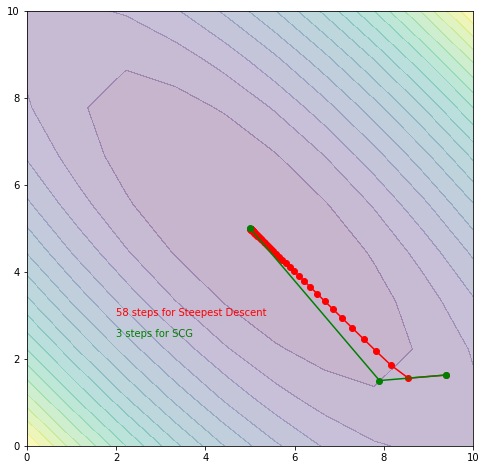

In [7]:
import mlutilities as ml

def parabola(x,xmin,s):
    d = x - xmin
    return np.dot(np.dot(d,S),d.T)

def parabolaGrad(x,xmin,s):
    d = x - xmin
    return 2 * np.dot(s,d)

f = parabola
df = parabolaGrad
center = np.array([5,5])
S = np.array([[5,4],[4,5]])

n = 10
xs = np.linspace(0,10,n)
ys = np.linspace(0,10,n)
X,Y = np.meshgrid(xs,ys)
both = np.vstack((X.flat,Y.flat)).T
nall = n*n
Z = np.zeros(nall)
for i in range(n*n):
    Z[i] = parabola(both[i,:],center,S)
Z.resize((n,n))

fig = plt.figure(figsize=(8,8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(0,10,2)

    resultSCG = ml.scg(firstx, f, df, center, S, xPrecision=0.001, xtracep=True)
    resultSteepest =  ml.steepest(firstx, f, df, center, S, stepsize=0.05, xPrecision=0.001, xtracep=True)

    plt.clf()
    plt.contourf(X, Y, Z, 20, alpha=0.3)
    plt.axis('tight')
    
    xt = resultSteepest['xtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'ro-')

    xt = resultSCG['xtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'go-')

    plt.text(2, 3, "%s steps for Steepest Descent" % resultSteepest['xtrace'].shape[0], color='red')
    plt.text(2, 2.5, "%s steps for SCG" % resultSCG['xtrace'].shape[0], color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 

Rosenbrock's function is often used to test optimization algorithms.
It is

$$
f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

In [8]:
def rosen(x):
    v = 100 * ((x[1] - x[0]**2)**2) + (1.0 - x[0])**2
    return v

def rosenGrad(x):
    g1 = -400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0])
    g2 =  200 * (x[1] - x[0]**2)
    return np.array([g1, g2])

f = rosen
df = rosenGrad

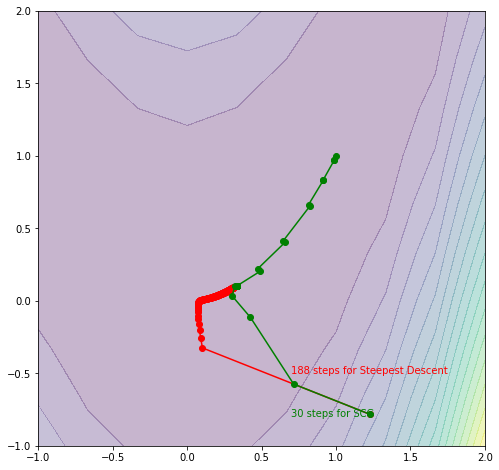

In [9]:
n = 10
xmin, xmax = -1,2
xs = np.linspace(xmin, xmax, n)
ys = np.linspace(xmin, xmax, n)
X, Y = np.meshgrid(xs, ys)
both = np.vstack((X.flat, Y.flat)).T
nall = n * n
Z = np.zeros(nall)
for i in range(n * n):
    Z[i] = f(both[i, :])
Z.resize((n, n))

fig = plt.figure(figsize=(8, 8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(xmin, xmax, 2)

    resultSCG = ml.scg(firstx, f, df, xPrecision=0.001, xtracep=True)
    resultSteepest =  ml.steepest(firstx, f, df, stepsize=0.001, xPrecision=0.001, xtracep=True)

    plt.clf()
    plt.contourf(X, Y, Z, 20, alpha=0.3)
    plt.axis('tight')
    
    xt = resultSteepest['xtrace']
    plt.plot(xt[: ,0], xt[:, 1], 'ro-')

    xt = resultSCG['xtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'go-')

    plt.text(0.7, -0.5, "%s steps for Steepest Descent" % resultSteepest['nIterations'], color='red')
    plt.text(0.7, -0.8, "%s steps for SCG" % resultSCG['nIterations'], color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 

Only difficulty is that our *scg* (and *steepest*) implementation
requires all parameters to be concatenated in a single vector.  We
will use *pack* and *unpack* functions to concatentate and extract
$V$ and $W$ matrices.

Here is our example from last time again, but now using our
*ScaledConjugateGradient* module.

In [4]:
# Make some training data
n = 20
X = np.linspace(0., 20.0, n).reshape((n, 1))
T = 0.2 + 0.05 * X + 0.4 * np.sin(X) + 0.2 * np.random.normal(size=(n, 1))

# Make some testing data
Xtest = X + 0.1 * np.random.normal(size=(n, 1))
Ttest = 0.2 + 0.05 * X + 0.4 * np.sin(Xtest) + 0.2 * np.random.normal(size=(n, 1))

def addOnes(A):
    return np.insert(A, 0, 1, axis=1)

In [5]:
# Set parameters of neural network
nInputs = X.shape[1]
nHiddens = 10
nOutputs = T.shape[1]

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1, nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens, nOutputs))-0.5)

X1 = addOnes(X)
Xtest1 = addOnes(Xtest)

### gradientDescent functions require all parameters in a vector.
def pack(V, W):
    return np.hstack((V.flat, W.flat))

def unpack(w):
    '''Assumes V, W, nInputs, nHidden, nOuputs are defined in calling context'''
    V[:] = w[:(nInputs+1)*nHiddens].reshape((nInputs+1, nHiddens))
    W[:] = w[(nInputs+1)*nHiddens:].reshape((nHiddens+1, nOutputs))

In [ ]:
### Function f to be minimized
def objectiveF(w):
    unpack(w)
    # Forward pass on training data
    Y = addOnes(np.tanh(X1 @ V)) @ W
    return 0.5 * np.mean((T - Y)**2)

In [ ]:
### Gradient of f with respect to V,W
def gradientF(w):
    unpack(w)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W
    nSamples = X1.shape[0]
    nOutputs = T.shape[1]
    error = -(T - Y) / (nSamples*nOutputs)
    dV = X1.T @ (error @ W[1:,:].T * (1-Z**2))
    dW = Z1.T @ error
    return pack(dV,dW)

In [6]:
# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1, nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens, nOutputs))-0.5)

result = ml.scg(pack(V, W), objectiveF, gradientF, nIterations = 2000, ftracep = True)
unpack(result['x'])  # copy best parameters into V and W
errorTrace = result['ftrace']
print('Ran for', len(errorTrace), 'iterations')

NameError: name 'ml' is not defined

In [ ]:
errorTrace[:10]

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(errorTrace)
nEpochs = len(errorTrace)
plt.xlim(0 - 0.05 * nEpochs, nEpochs * 1.05)
plt.xlabel('Epochs')
plt.ylabel('Train RMSE')

plt.subplot(3, 1, 2)
Y = addOnes(np.tanh(X1 @ V)) @ W 
Ytest = addOnes(np.tanh(Xtest1 @ V)) @ W
plt.plot(X, T, 'o-', Xtest, Ttest, 'o-', Xtest, Ytest, 'o-')
plt.xlim(0, 20)
plt.legend(('Training', 'Testing', 'Model'), loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')
        
plt.subplot(3, 1, 3)
Z = np.tanh(X1 @ V)
plt.plot(X, Z)
plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

## Neural Network Class

Python includes the ability to define new classes.  Let's write one for neural networks.  First, let's discuss how it might be used. Make it as easy for the user as possible.

    X = ...
    T = ...
    nnet = NeuralNetWork(1, 5, 1)  # 1 input, 5 hidden units, 1 output
    nnet.train(X, T, nIterations=100)
    Y = nnet.use(X)
    
This implementation is for any number of hidden layers!

In [1]:
%%writefile neuralnetworks.py

import numpy as np
import mlutilities as ml
import matplotlib.pyplot as plt
from copy import copy
import time


class NeuralNetwork:

    def __init__(self, ni, nhs, no):
        if isinstance(nhs, list) or isinstance(nhs, tuple):
            nihs = [ni] + list(nhs)
        else:
            if nhs > 0:
                nihs = [ni, nhs]
                nhs = [nhs]
            else:
                nihs = [ni]
                nhs = []
        if len(nihs) > 1:
            self.Vs = [1/np.sqrt(nihs[i]) *
                       np.random.uniform(-1, 1, size=(1+nihs[i], nihs[i+1])) for i in range(len(nihs)-1)]
            self.W = 1/np.sqrt(nhs[-1]) * np.random.uniform(-1, 1, size=(1+nhs[-1], no))
        else:
            self.Vs = []
            self.W = 1/np.sqrt(ni) * np.random.uniform(-1, 1, size=(1+ni, no))
        self.ni, self.nhs, self.no = ni, nhs, no
        self.Xmeans = None
        self.Xstds = None
        self.Tmeans = None
        self.Tstds = None
        self.trained = False
        self.reason = None
        self.errorTrace = None
        self.numberOfIterations = None
        self.trainingTime = None

    def __repr__(self):
        str = 'NeuralNetwork({}, {}, {})'.format(self.ni, self.nhs, self.no)
        # str += '  Standardization parameters' + (' not' if self.Xmeans == None else '') + ' calculated.'
        if self.trained:
            str += '\n   Network was trained for {} iterations that took {:.4f} seconds. Final error is {}.'.format(self.numberOfIterations, self.getTrainingTime(), self.errorTrace[-1])
        else:
            str += '  Network is not trained.'
        return str

    def _standardizeX(self, X):
        result = (X - self.Xmeans) / self.XstdsFixed
        result[:, self.Xconstant] = 0.0
        return result

    def _unstandardizeX(self, Xs):
        return self.Xstds * Xs + self.Xmeans

    def _standardizeT(self, T):
        result = (T - self.Tmeans) / self.TstdsFixed
        result[:, self.Tconstant] = 0.0
        return result

    def _unstandardizeT(self, Ts):
        return self.Tstds * Ts + self.Tmeans

    def _pack(self, Vs, W):
        return np.hstack([V.flat for V in Vs] + [W.flat])

    def _unpack(self, w):
        first = 0
        numInThisLayer = self.ni
        for i in range(len(self.Vs)):
            self.Vs[i][:] = w[first:first+(numInThisLayer+1)*self.nhs[i]].reshape((numInThisLayer+1, self.nhs[i]))
            first += (numInThisLayer+1) * self.nhs[i]
            numInThisLayer = self.nhs[i]
        self.W[:] = w[first:].reshape((numInThisLayer+1, self.no))

    def _objectiveF(self, w, X, T):
        self._unpack(w)
        # Do forward pass through all layers
        Zprev = X
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = np.tanh(Zprev @ V[1:, :] + V[0:1, :])  # handling bias weight without adding column of 1's
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        return 0.5 * np.mean((T-Y)**2)

    def _gradientF(self, w, X, T):
        self._unpack(w)
        # Do forward pass through all layers
        Zprev = X
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = np.tanh(Zprev @ V[1:, :] + V[0:1, :])
            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        # Do backward pass, starting with delta in output layer
        delta = -(T - Y) / (X.shape[0] * T.shape[1])
        dW = np.vstack((np.ones((1, delta.shape[0])) @ delta, 
                        Z[-1].T @ delta))
        dVs = []
        delta = (1 - Z[-1]**2) * (delta @ self.W[1:, :].T)
        for Zi in range(len(self.nhs), 0, -1):
            Vi = Zi - 1  # because X is first element of Z
            dV = np.vstack((np.ones((1, delta.shape[0])) @ delta,
                            Z[Zi-1].T @ delta))
            dVs.insert(0, dV)
            delta = (delta @ self.Vs[Vi][1:, :].T) * (1 - Z[Zi-1]**2)
        return self._pack(dVs, dW)

    def train(self, X, T, nIterations=100, verbose=False,
              weightPrecision=0, errorPrecision=0, saveWeightsHistory=False):
        
        if self.Xmeans is None:
            self.Xmeans = X.mean(axis=0)
            self.Xstds = X.std(axis=0)
            self.Xconstant = self.Xstds == 0
            self.XstdsFixed = copy(self.Xstds)
            self.XstdsFixed[self.Xconstant] = 1
        X = self._standardizeX(X)

        if T.ndim == 1:
            T = T.reshape((-1, 1))

        if self.Tmeans is None:
            self.Tmeans = T.mean(axis=0)
            self.Tstds = T.std(axis=0)
            self.Tconstant = self.Tstds == 0
            self.TstdsFixed = copy(self.Tstds)
            self.TstdsFixed[self.Tconstant] = 1
        T = self._standardizeT(T)

        startTime = time.time()

        scgresult = ml.scg(self._pack(self.Vs, self.W),
                            self._objectiveF, self._gradientF,
                            X, T,
                            xPrecision=weightPrecision,
                            fPrecision=errorPrecision,
                            nIterations=nIterations,
                            verbose=verbose,
                            ftracep=True,
                            xtracep=saveWeightsHistory)

        self._unpack(scgresult['x'])
        self.reason = scgresult['reason']
        self.errorTrace = np.sqrt(scgresult['ftrace']) # * self.Tstds # to _unstandardize the MSEs
        self.numberOfIterations = len(self.errorTrace)
        self.trained = True
        self.weightsHistory = scgresult['xtrace'] if saveWeightsHistory else None
        self.trainingTime = time.time() - startTime
        return self

    def use(self, X, allOutputs=False):
        Zprev = self._standardizeX(X)
        Z = [Zprev]
        for i in range(len(self.nhs)):
            V = self.Vs[i]
            Zprev = np.tanh(Zprev @ V[1:, :] + V[0:1, :])
            Z.append(Zprev)
        Y = Zprev @ self.W[1:, :] + self.W[0:1, :]
        Y = self._unstandardizeT(Y)
        return (Y, Z[1:]) if allOutputs else Y

    def getNumberOfIterations(self):
        return self.numberOfIterations

    def getErrors(self):
        return self.errorTrace

    def getTrainingTime(self):
        return self.trainingTime

    def getWeightsHistory(self):
        return self.weightsHistory

    def draw(self, inputNames=None, outputNames=None, gray=False):
        ml.draw(self.Vs, self.W, inputNames, outputNames, gray)
 
if __name__ == '__main__':

    X = np.arange(10).reshape((-1, 1))
    T = X + 2

    net = NeuralNetwork(1, 0, 1)
    net.train(X, T, 10)
    print(net)
    
    net = NeuralNetwork(1, [5, 5], 1)
    net.train(X, T, 10)
    print(net)

Overwriting neuralnetworks.py


If the above class definition is placed in a file named *neuralnetworks.py*, then an instance of this class can be instantiated using code like

    import neuralnetworks as nn
    nnet = nn.NeuralNetwork(1, 4, 1)
    
The files *neuralnetworks.py* and *scaledconjugategradient.py*  must be in your working directory.

SCG stopped after 1001 iterations: did not converge
Training took 0.3465437889099121 seconds.
Final RMSE: train 5.58658205725 test 9.21059387185


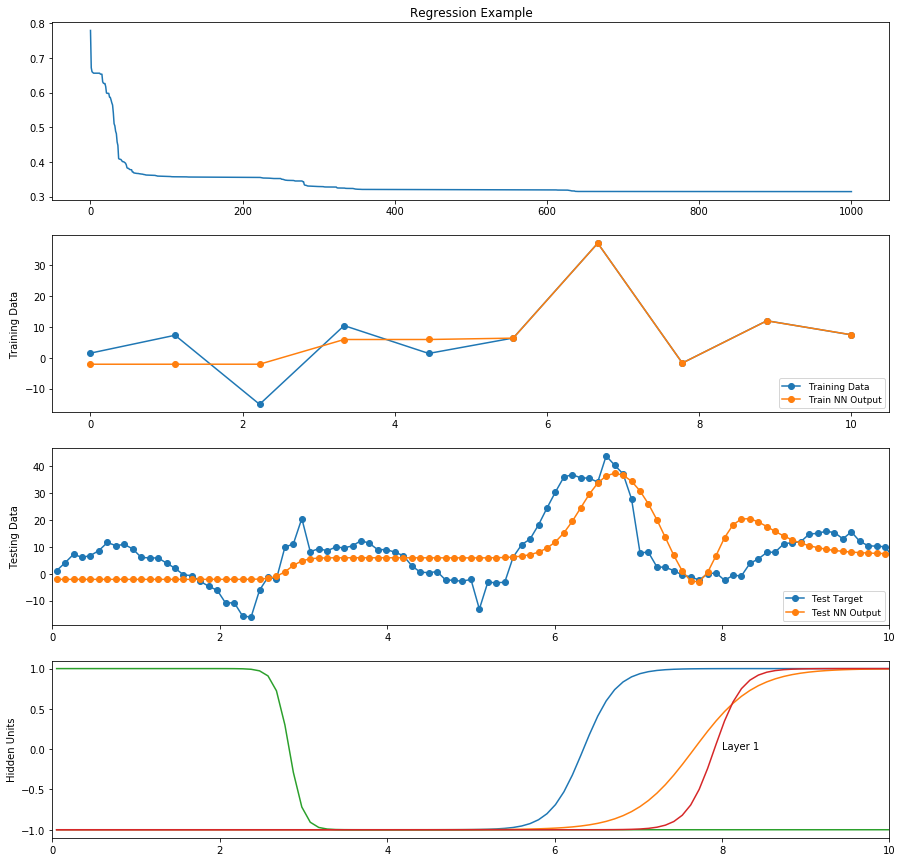

In [7]:
import neuralnetworks as nn
import imp
imp.reload(nn)

nSamples = 10
X = np.linspace(0, 10, nSamples).reshape((-1, 1))
T = 1.5 + 0.6 * X + 8 * np.sin(2.2*X)
T[np.logical_and(X > 2, X < 3)] *= 3
T[np.logical_and(X > 5, X < 7)] *= 3

nSamples = 100
Xtest = np.linspace(0, 10, nSamples).reshape((-1, 1)) + 10.0/nSamples/2
Ttest = 1.5 + 0.6 * Xtest + 8 * np.sin(2.2*Xtest) + np.random.uniform(-2, 2, size=(nSamples, 1))
Ttest[np.logical_and(Xtest > 2, Xtest < 3)] *= 3
Ttest[np.logical_and(Xtest > 5, Xtest < 7)] *= 3

nnet = nn.NeuralNetwork(1, 4, 1)

nnet.train(X, T, errorPrecision=1.e-10, weightPrecision=1.e-10, nIterations=1000)
print('SCG stopped after', nnet.getNumberOfIterations(), 'iterations:', nnet.reason)
print('Training took', nnet.getTrainingTime(), 'seconds.')
Y = nnet.use(X)
Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)), "test", np.sqrt(np.mean((Ytest-Ttest)**2)))

plt.figure(figsize=(15, 15))

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

plt.subplot(nPlotRows, 1, 1)
plt.plot(nnet.getErrors())
plt.title('Regression Example')

plt.subplot(nPlotRows, 1, 2)
plt.plot(X, T, 'o-', label='Training Data')
plt.plot(X, Y, 'o-', label='Train NN Output')
plt.ylabel('Training Data')
plt.legend(loc='lower right', prop={'size':9})

plt.subplot(nPlotRows, 1, 3)
plt.plot(Xtest, Ttest, 'o-', label='Test Target')
plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')
plt.ylabel('Testing Data')
plt.xlim(0, 10)
plt.legend(loc='lower right', prop={'size':9})
for i in range(nHLayers):
    layer = nHLayers - i - 1
    plt.subplot(nPlotRows, 1, i+4)
    plt.plot(Xtest, Ztest[layer])
    plt.xlim(0,10)
    plt.ylim(-1.1,1.1)
    plt.ylabel('Hidden Units')
    plt.text(8,0, 'Layer {}'.format(layer+1))

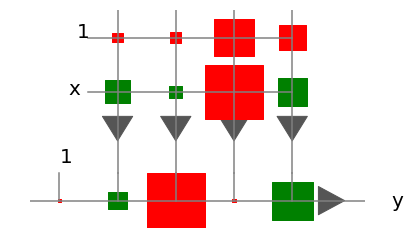

In [8]:
nnet.draw(['x'],['y'])

In [9]:
nnet

NeuralNetwork(1, [4], 1)
   Network was trained for 1001 iterations that took 0.3465 seconds. Final error is 0.314584430991051.

What happens if we add another two hidden layers, for a total of three hidden layers?  Let's use 5 units in each hidden layer.

In [12]:
nnet = nn.NeuralNetwork(1, (5, 5), 1)

In [13]:
nnet

NeuralNetwork(1, (5, 5), 1)  Network is not trained.

The rest of the code is the same.  Even the plotting code written above works for as many hidden layers as we create.

SCG stopped after 1001 iterations: did not converge
Final RMSE: train 5.63700208897e-13 test 7.18771989221


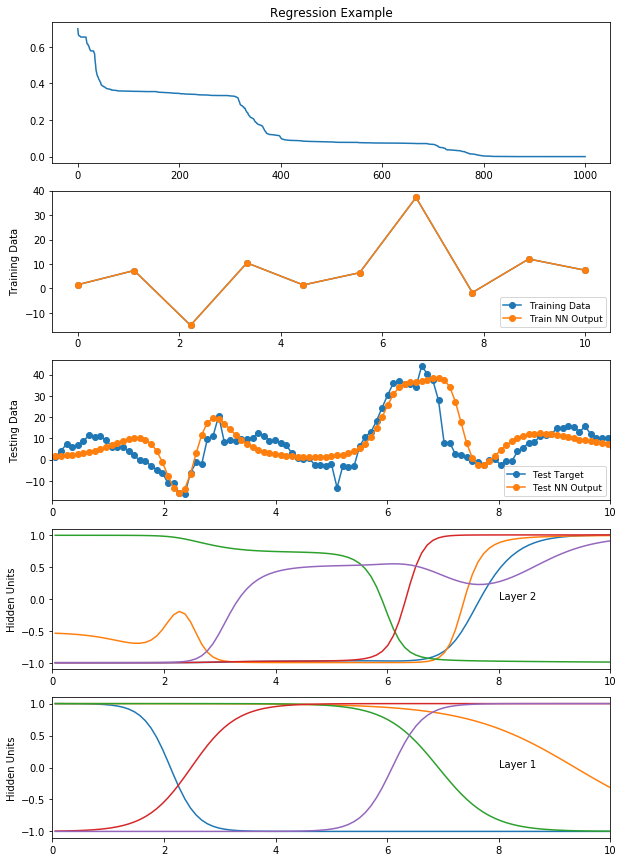

In [14]:
nnet.train(X, T, nIterations=1000) # precision not included, so defaults of zero used, which means will not terminate early
print("SCG stopped after", nnet.getNumberOfIterations(), "iterations:", nnet.reason)
Y = nnet.use(X)
Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)),"test", np.sqrt(np.mean((Ytest-Ttest)**2)))

plt.figure(figsize=(10, 15))

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

plt.subplot(nPlotRows, 1, 1)
plt.plot(nnet.getErrors())
plt.title('Regression Example')

plt.subplot(nPlotRows, 1, 2)
plt.plot(X, T, 'o-', label='Training Data')
plt.plot(X, Y, 'o-', label='Train NN Output')
plt.ylabel('Training Data')
plt.legend(loc='lower right', prop={'size':9})

plt.subplot(nPlotRows, 1, 3)
plt.plot(Xtest, Ttest, 'o-', label='Test Target')
plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')
plt.ylabel('Testing Data')
plt.xlim(0, 10)
plt.legend(loc='lower right', prop={'size':9})
for i in range(nHLayers):
    layer = nHLayers-i-1
    plt.subplot(nPlotRows, 1, i+4)
    plt.plot(Xtest, Ztest[layer])
    plt.xlim(0, 10)
    plt.ylim(-1.1, 1.1)
    plt.ylabel('Hidden Units')
    plt.text(8, 0, 'Layer {}'.format(layer+1))

For more fun, wrap the above code in a function to make it easy to try different network structures.

In [16]:
def run(X, T, hiddenUnits, nIterations=100, verbose=False):
    if X.shape[1] != 1 or T.shape[1] != 1:
        print('This function written for one-dimensional input samples, X, and one-dimensional targets, T.')
        return
    
    nnet = nn.NeuralNetwork(1, hiddenUnits,1 )

    nnet.train(X, T, nIterations=nIterations, verbose=verbose)
    # print("SCG stopped after",nnet.getNumberOfIterations(),"iterations:",nnet.reason)
    Y = nnet.use(X)
    Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
    print('Training took {:.4f} seconds.'.format(nnet.getTrainingTime()))
    print("Final RMSE: train", np.sqrt(np.mean((Y-T)**2)), "test", np.sqrt(np.mean((Ytest-Ttest)**2)))

    plt.figure(figsize=(10, 15))
    nHLayers = len(nnet.nhs)
    nPlotRows = 3 + nHLayers

    plt.subplot(nPlotRows, 1, 1)
    plt.plot(nnet.getErrors())
    plt.title('Regression Example')

    plt.subplot(nPlotRows, 1, 2)
    plt.plot(X, T, 'o-', label='Training Data')
    plt.plot(X, Y, 'o-', label='Train NN Output')
    plt.ylabel('Training Data')
    plt.legend(loc='lower right', prop={'size':9})

    plt.subplot(nPlotRows, 1, 3)
    plt.plot(Xtest, Ttest, 'o-', label='Test Target')
    plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')
    plt.ylabel('Testing Data')
    plt.xlim(0, 10)
    plt.legend(loc='lower right', prop={'size':9})
    for i in range(nHLayers):
        layer = nHLayers-i-1
        plt.subplot(nPlotRows, 1, i+4)
        plt.plot(Xtest, Ztest[layer])
        plt.xlim(0, 10)
        plt.ylim(-1.1, 1.1)
        plt.ylabel('Hidden Units')
        plt.text(8, 0, 'Layer {}'.format(layer+1))
    return nnet

Training took 0.3991 seconds.
Final RMSE: train 3.94623804923 test 7.90665853516


NeuralNetwork(1, (2, 2), 1)
   Network was trained for 1001 iterations that took 0.3991 seconds. Final error is 0.22221548677738986.

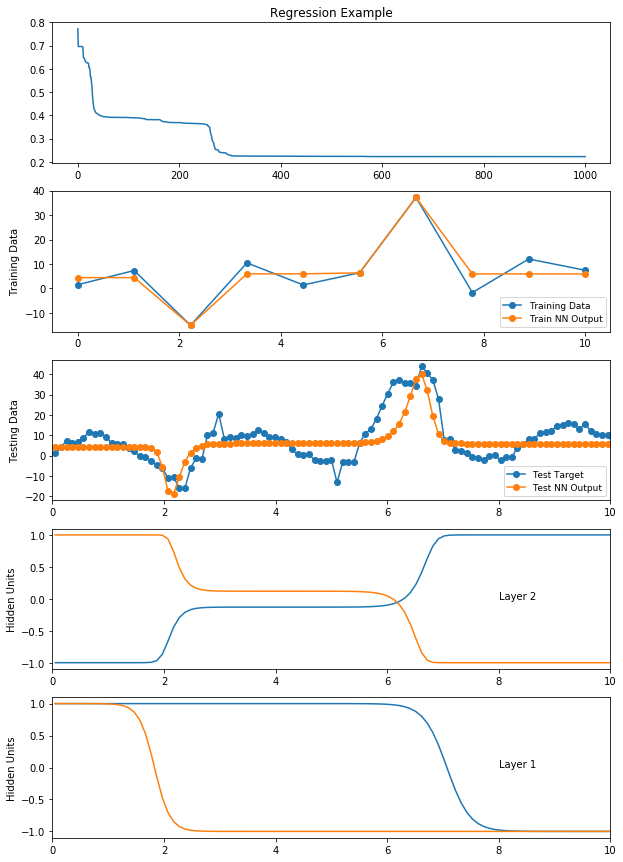

In [17]:
run(X, T, (2, 2), nIterations=1000)

Training took 0.6806 seconds.
Final RMSE: train 9.21870937541 test 9.30346091817


NeuralNetwork(1, (2, 2, 2, 2), 1)
   Network was trained for 1001 iterations that took 0.6806 seconds. Final error is 0.519112117859674.

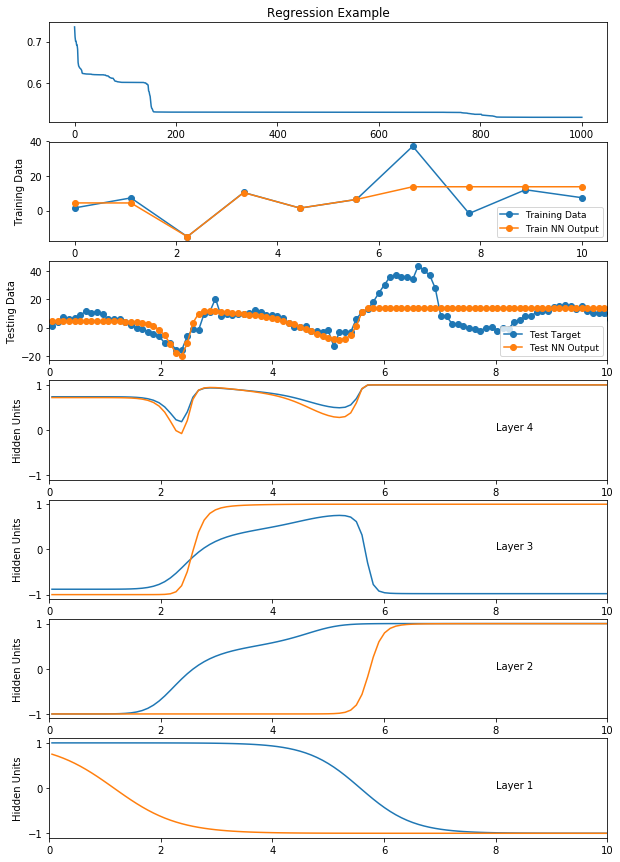

In [18]:
run(X, T, (2, 2, 2, 2), nIterations=1000)

In [19]:
[2]*6

[2, 2, 2, 2, 2, 2]

Training took 3.3679 seconds.
Final RMSE: train 2.61264328318 test 12.5950955871


NeuralNetwork(1, [2, 2, 2, 2, 2, 2], 1)
   Network was trained for 4001 iterations that took 3.3679 seconds. Final error is 0.14711981175615121.

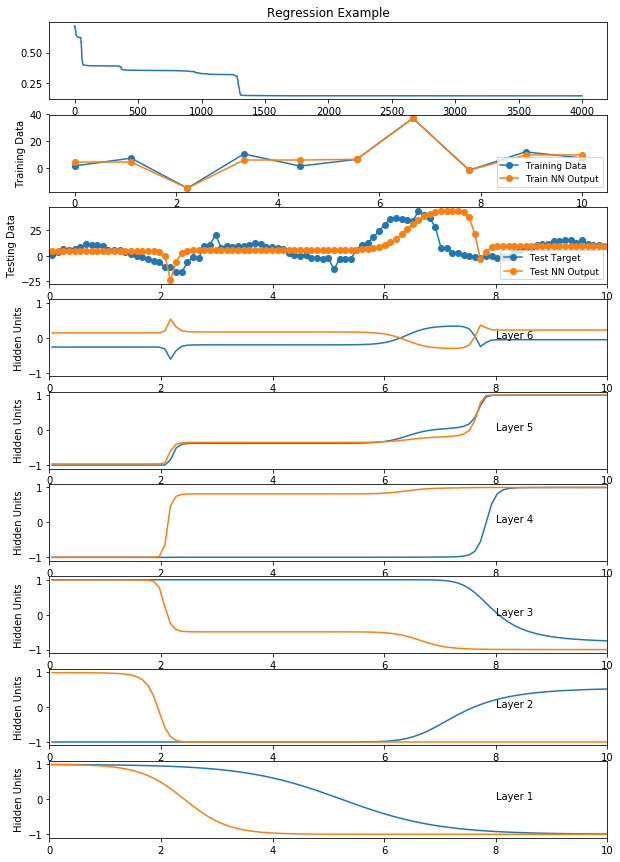

In [21]:
run(X, T, [2]*6, nIterations=4000)

Can you say "deep learning"?

This last example doesn't always work.  Depends a lot on good initial random weight values. Go back to the above cell and run it again and again, until you see it not work.

In [35]:
nnet = run(X, T, [50,10,3,1,3,10,50], nIterations=1000, verbose=True)
nnet

SCG: Iteration 100 fValue Eval 0.116421059083 Scale 1.41294015309e-09
SCG: Iteration 200 fValue Eval 0.0262633821831 Scale 6.8719476736e-05
SCG: Iteration 300 fValue Eval 8.77856202717e-07 Scale 1e-15
SCG: Iteration 400 fValue Eval 1.70433307816e-15 Scale 1e-15
SCG: Iteration 500 fValue Eval 3.80261866249e-24 Scale 1e-15
SCG: Iteration 600 fValue Eval 3.01941428433e-27 Scale 38685626227.66814
SCG: Iteration 700 fValue Eval 3.01941428433e-27 Scale 1e+20
SCG: Iteration 800 fValue Eval 3.01941428433e-27 Scale 1e+20
SCG: Iteration 900 fValue Eval 3.01941428433e-27 Scale 1e+20
SCG: Iteration 1000 fValue Eval 3.01941428433e-27 Scale 1e+20


NeuralNetwork(1, [50, 10, 3, 1, 3, 10, 50], 1)
   Network was trained for 1001 iterations that took 1.3617 seconds. Final error is 5.494919730375282e-14.

Run the above cell several times to see very different solutions as observed in the pattern of hidden layer outputs.

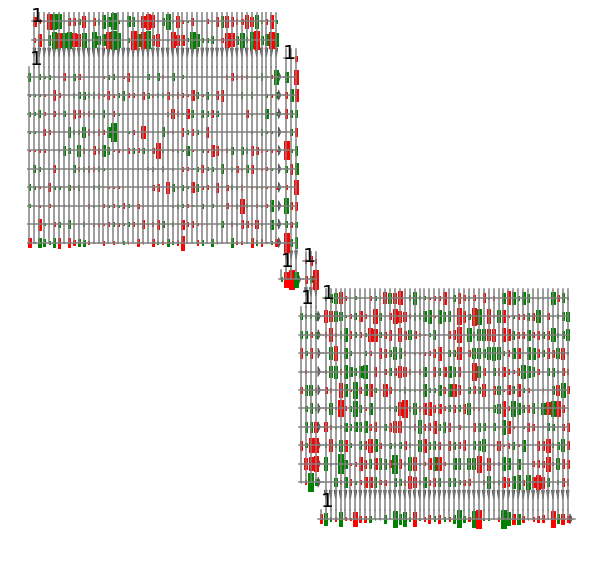

In [23]:
plt.figure(figsize=(10, 10))
nnet.draw()

Let's try saving the weights after each iteration and then make a movie showing how the outputs of each layer change as the network is trained.

In [25]:
def run(X, T, hiddenUnits, nIterations=100, verbose=False, saveWeightsHistory=False):
    if X.shape[1] != 1 or T.shape[1] != 1:
        print('This function written for one-dimensional input samples, X, and one-dimensional targets, T.')
        return
    nnet = nn.NeuralNetwork(1, hiddenUnits,1 )
    nnet.train(X, T, nIterations=nIterations, verbose=verbose, saveWeightsHistory=saveWeightsHistory)
    return nnet

In [26]:
nnet = run(X, T, [50,10,3,1,3,10,50], nIterations=500, verbose=True, saveWeightsHistory=True)
nnet

SCG: Iteration 50 fValue Eval 0.158056294082 Scale 0.000164944229833
SCG: Iteration 100 fValue Eval 0.135813379091 Scale 1e-15
SCG: Iteration 150 fValue Eval 0.12852457355 Scale 1.073741824e-06
SCG: Iteration 200 fValue Eval 0.1253594618 Scale 1e-15
SCG: Iteration 250 fValue Eval 0.11247038791 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.0610055814316 Scale 1e-15
SCG: Iteration 350 fValue Eval 0.0322376472893 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.0194939717434 Scale 1e-15
SCG: Iteration 450 fValue Eval 0.0134715700491 Scale 1e-15
SCG: Iteration 500 fValue Eval 0.0103227438555 Scale 2.147483648e-06


NeuralNetwork(1, [50, 10, 3, 1, 3, 10, 50], 1)
   Network was trained for 501 iterations that took 0.7061 seconds. Final error is 0.1016009047965499.

In [27]:
nnet = run(X, T, [20, 5, 3], nIterations=1000, verbose=True, saveWeightsHistory=True)
nnet

SCG: Iteration 100 fValue Eval 0.126722615215 Scale 9.30470613016e-14
SCG: Iteration 200 fValue Eval 0.122366293805 Scale 1e-15
SCG: Iteration 300 fValue Eval 0.12144748409 Scale 1e-15
SCG: Iteration 400 fValue Eval 0.0808815354944 Scale 5.55231785746e-12
SCG: Iteration 500 fValue Eval 0.0237927991028 Scale 1e-15
SCG: Iteration 600 fValue Eval 0.000161637957053 Scale 1e-15
SCG: Iteration 700 fValue Eval 1.68456266316e-10 Scale 1e-15
SCG: Iteration 800 fValue Eval 1.313295195e-26 Scale 1e-15
SCG: Iteration 900 fValue Eval 2.35199486161e-28 Scale 1e+20
SCG: Iteration 1000 fValue Eval 2.35199486161e-28 Scale 1e+20


NeuralNetwork(1, [20, 5, 3], 1)
   Network was trained for 1001 iterations that took 0.6811 seconds. Final error is 1.533621485769648e-14.

In [28]:
from matplotlib import animation
import matplotlib # for next statement
matplotlib.rc('animation', html='html5')

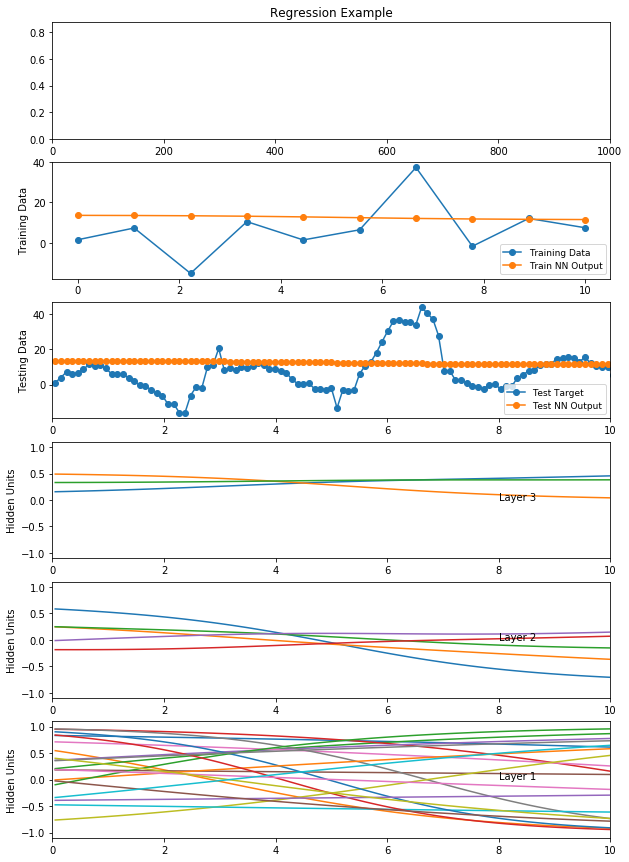

In [34]:
weightsHistory = nnet.getWeightsHistory()
nnet._unpack(weightsHistory[0,:])
Y = nnet.use(X)
Ytest, Ztest = nnet.use(Xtest, allOutputs=True)

nHLayers = len(nnet.nhs)
nPlotRows = 3 + nHLayers

fig = plt.figure(figsize=(10, 15))
plt.subplot(nPlotRows, 1, 1)
errors = nnet.getErrors()
errorsLine = plt.plot(0,errors[0])[0]
plt.xlim(0,len(errors))
plt.ylim(0,np.max(errors)*1.1)

plt.title('Regression Example')

plt.subplot(nPlotRows, 1, 2)
plt.plot(X, T, 'o-', label='Training Data')
trainLine = plt.plot(X, Y, 'o-', label='Train NN Output')[0]
plt.ylabel('Training Data')
plt.legend(loc='lower right', prop={'size':9})

plt.subplot(nPlotRows, 1, 3)
plt.plot(Xtest, Ttest, 'o-', label='Test Target')
testLine = plt.plot(Xtest, Ytest, 'o-', label='Test NN Output')[0]
plt.ylabel('Testing Data')
plt.xlim(0, 10)
plt.legend(loc='lower right', prop={'size':9})
hiddenOutputLines = []
for i in range(nHLayers):
    layer = nHLayers-i-1
    plt.subplot(nPlotRows, 1, i+4)
    hiddenOutputLines.append( plt.plot(Xtest, Ztest[layer]) )
    plt.xlim(0, 10)
    plt.ylim(-1.1, 1.1)
    plt.ylabel('Hidden Units')
    plt.text(8, 0, 'Layer {}'.format(layer+1))
    
updatesPerFrame = 2

def animator(framei):
    step = framei * updatesPerFrame
    nnet._unpack(weightsHistory[step,:])
    Y = nnet.use(X)
    Ytest, Ztest = nnet.use(Xtest, allOutputs=True)
    errorsLine.set_data(range(step),errors[:step])
    trainLine.set_ydata(Y)
    testLine.set_ydata(Ytest)
    
    for iLayer in range(len(hiddenOutputLines)):
        HOLines = hiddenOutputLines[iLayer]
        Zlayer = Ztest[nHLayers - iLayer - 1]
        for iUnit in range(len(HOLines)):
            HOLines[iUnit].set_ydata(Zlayer[:,iUnit])
    return [errorsLine, trainLine, testLine] + hiddenOutputLines

In [33]:
nFrames = len(nnet.getErrors()) // updatesPerFrame # integer divide
anim = animation.FuncAnimation(fig, animator, frames=nFrames, interval=50, blit=False)

In [32]:
anim

KeyError: 'ffmpeg'